In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


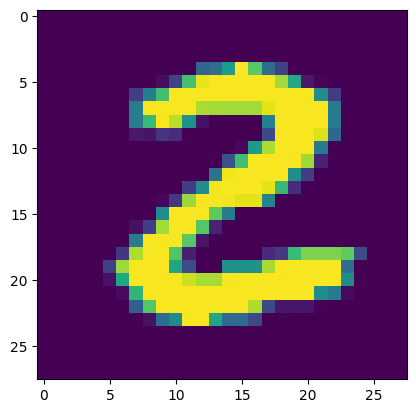

2


In [ ]:
plt.imshow(x_train[25])
plt.show()

print(y_train[25])

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1524 - accuracy: 0.9527
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1122 - accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632 - accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0470 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.032

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0994 - accuracy: 0.9737
0.9736999869346619


In [ ]:
print(x_test.shape)

(10000, 28, 28)


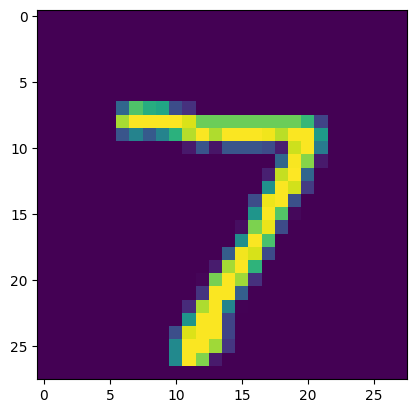

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[1.3743599e-03 7.1067305e-05 9.5298880e-01 9.9838197e-01 9.2604711e-07
 3.2941774e-01 9.3704515e-13 9.9999988e-01 2.3379950e-02 8.2603061e-01]


In [ ]:
label_for_first_image = np.argmax(y_pred[0])
label_for_first_image

7

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 9, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 963    1    3    0    2    2    3    2    2    2]
 [   0 1123    4    0    0    2    2    1    3    0]
 [   1    2 1010    5    4    0    2    4    3    1]
 [   0    1    9  973    1   16    0    3    4    3]
 [   0    0    1    0  968    2    4    0    0    7]
 [   1    0    0    3    1  879    4    0    2    2]
 [   3    3    1    1    6   15  927    0    2    0]
 [   0    6   12    3    6    0    0  991    1    9]
 [   2    0    4    7    5   14    2    3  933    4]
 [   3    2    0    4   19    5    1    6    0  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

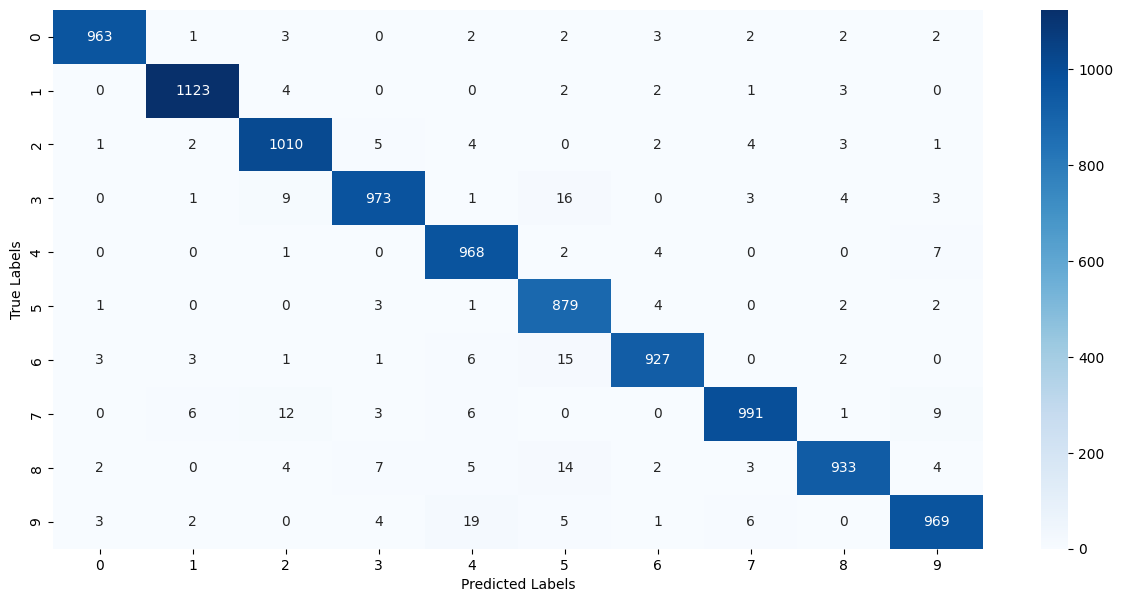

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [61]:
input_image_path = '/content/test.png'
input_image = cv2.imread(input_image_path)

In [62]:
type(input_image)

numpy.ndarray

In [63]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


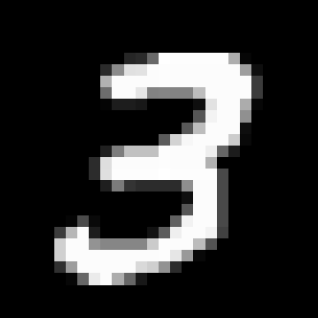

In [66]:
cv2_imshow(input_image)

In [67]:
input_image.shape

(318, 318, 3)

In [68]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [69]:
grayscale.shape

(318, 318)

In [70]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [71]:
input_image_resize.shape

(28, 28)

In [73]:
cv2_imshow(input_image_resize)

In [74]:
input_image_resize = input_image_resize / 255

In [79]:
input_reshape = np.reshape(input_image_resize, [1,28,28])

In [80]:
input_prediction = model.predict(input_reshape)
print(input_prediction)

1/1 [==============================] - 0s 28ms/step
[[6.5809914e-12 5.8476815e-07 9.8331821e-01 1.0000000e+00 5.5129354e-09
  9.6737409e-01 7.8273561e-15 9.1488502e-05 9.2121273e-01 9.9604410e-01]]


In [82]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Path of the image to be predicted : /content/test.png


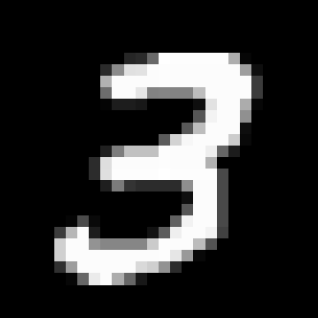

1/1 [==============================] - 0s 29ms/step
The handwritten digit is recognised as  3


In [83]:
input_image_path = input('Path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize / 255

input_reshape = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(input_reshape)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognised as ', input_pred_label)